# Simulation of HHG generation in a periodically modulated gas target

Target and driving beam parameters are set by input parameters.
Output harmonic signal is calculated for varying gas pressure.

In [211]:
# imports

import numpy as np 
import matplotlib.pyplot as plt


import mynumerics as mn
import XUV_signal_computation2 as XUV_sig
import XUV_refractive_index as XUV_index

In [212]:
# Simulation parameters

# General parameters
H_opt = 23 # optimized harmonic order

# Driving beam parameters
wavelength = 800 #nm - fundamental laser wavelength in nanometers
theta = 7.5 # mrad - half divergence angle of the G-B beam

# Target parameters
l1 = 0.4 # mm - lenght of medium segment
l2 = 0.9 # mm - length of vacuum segment
periods = 11 # number of periods

# Gas parameters
gas_type = 'Ar'
eta_factor = 0.25 #factor to multiply optimal ionization 'eta_opt' with
#pressure_range = [30e-3, 35e-3, 60e-3] # bar - range of pressure value to be simulated
pressure_range = np.linspace(1e-3, 70e-3, 101) # bar - range of pressure value to be simulated

# auxiliary parameters
# tables to be used:
XUV_table_type_absorption = 'Henke' # {Henke, NIST}    
XUV_table_type_dispersion = 'Henke'

In [213]:
# helper variables and functions

omegaSI = mn.ConvertPhoton(wavelength*1e-9, 'lambdaSI', 'omegaSI') 

parameters = {'XUV_table_type_dispersion': XUV_table_type_dispersion,
              'XUV_table_type_absorption': XUV_table_type_absorption,
              'gas_type': gas_type,
              'omegaSI': omegaSI,
              'Aq' : 1.0}

eta_opt = XUV_sig.eta_opt(H_opt, parameters)
eta_gen = eta_factor*eta_opt

zeta = XUV_sig.theta2zeta(theta*1e-3)

xi = l2/l1

H_interest = list(range(H_opt-6,H_opt+7,2))

def asymptotic_signal(p,omega, pressure):
    return 4.*((p*parameters['Aq'])**2)*XUV_index.L_abs(omega, pressure, gas_type + '_' + XUV_table_type_absorption)**2

In [214]:
# Calculations

signals = []
for pressure in pressure_range:
    #sig_norm = asymptotic_signal(pressure,H_opt*omegaSI, pressure)
    sig_norm = 1.0
    signal =[XUV_sig.periodic_medium_signal(pressure, zeta, l1*1e-3, xi, 
                                            eta_gen, H_calc, periods, 
                                            parameters)[1]/sig_norm 
                                            for H_calc in H_interest]
    signals.append(signal)

contrasts = [[s[H_interest.index(H_opt)]/
            max(s[:H_interest.index(H_opt)]+s[(H_interest.index(H_opt)+1):])
            for s in signals] for H_opt in H_interest]

target_length = l1*periods + l2*(periods-1)
print(f'Target length: {target_length} mm')

Target length: 13.4 mm


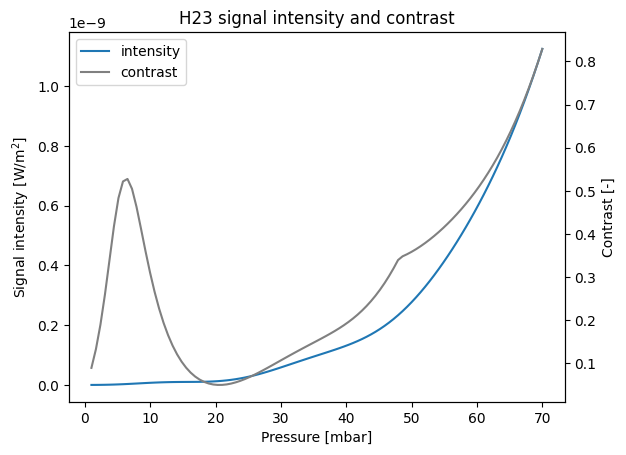

In [215]:
# Plot desired harmonic order intensity as a function of pressure

fig, ax1 = plt.subplots()
line1 = ax1.plot(pressure_range*1e3, [signal[H_interest.index(H_opt)] 
                              for signal in signals],
                              label='intensity')

plt.title(f'H{H_opt} signal intensity and contrast')
plt.xlabel('Pressure [mbar]')
ax1.set_ylabel('Signal intensity [W/m$^2$]')

ax2 = ax1.twinx()
ax2.set_ylabel("Contrast [-]")
line2 = ax2.plot(pressure_range*1e3, contrasts[H_interest.index(H_opt)], color='grey', label='contrast')

#Create combined legend for both y axes
lines = line1 + line2
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc=0)

plt.show()

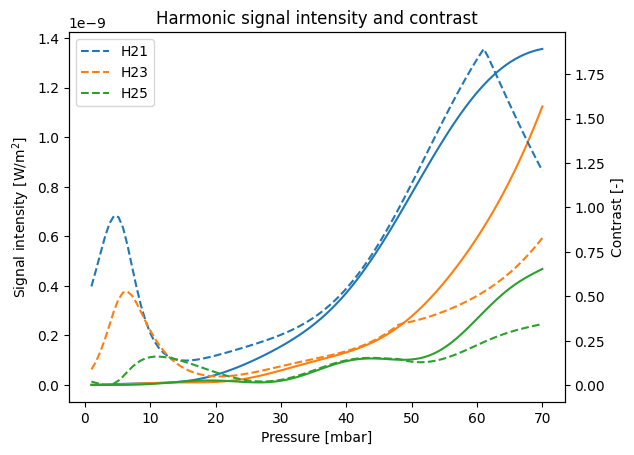

In [216]:
# Plot neigboring harmonic order intensities and contrasts as a function of pressure

fig, ax1 = plt.subplots()
ax1.plot(pressure_range*1e3, [signal[H_interest.index(H_opt)-1] 
                              for signal in signals],
                              label=f'H {H_opt-2}')
ax1.plot(pressure_range*1e3, [signal[H_interest.index(H_opt)] 
                              for signal in signals],
                              label=f'H {H_opt}')
ax1.plot(pressure_range*1e3, [signal[H_interest.index(H_opt)+1] 
                              for signal in signals],
                              label=f'H {H_opt+2}')


plt.title(f'Harmonic signal intensity and contrast')
plt.xlabel('Pressure [mbar]')
ax1.set_ylabel('Signal intensity [W/m$^2$]')

ax2 = ax1.twinx()
ax2.set_ylabel("Contrast [-]")
ax2.plot(pressure_range*1e3, contrasts[H_interest.index(H_opt)-1], linestyle='--', label=f'H{H_opt-2}')
ax2.plot(pressure_range*1e3, contrasts[H_interest.index(H_opt)], linestyle='--', label=f'H{H_opt}')
ax2.plot(pressure_range*1e3, contrasts[H_interest.index(H_opt)+1], linestyle='--', label=f'H{H_opt+2}')

plt.legend()

plt.show()

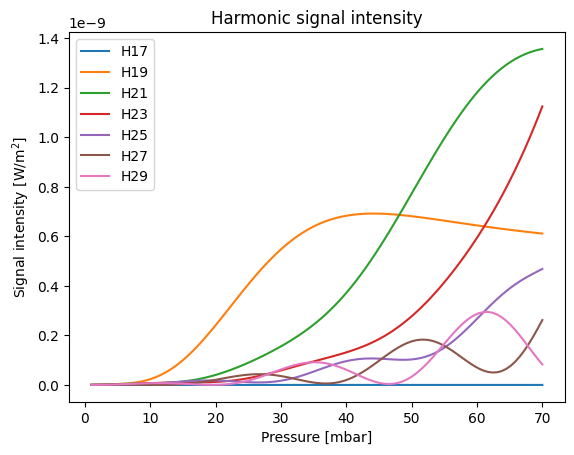

In [217]:
# Plot harmonic order intensities as a function of pressure

plt.figure()
for H in H_interest:
    plt.plot(pressure_range*1e3, [signal[H_interest.index(H)] 
                                  for signal in signals], label=f'H{H}')
plt.legend()

plt.title(f'Harmonic signal intensity')
plt.xlabel('Pressure [mbar]')
plt.ylabel('Signal intensity [W/m$^2$]')

plt.show()